Introduction :
    Customer churn is a costly issue for businesses, as a 2% decrease in churn equates to a 10% cost reduction. Retaining customers is also 6–7 times more cost-effective
    than acquiring new ones. Identifying at-risk customers early and offering them tailored incentives can significantly improve retention.
    Examples of churn include subscription cancellations, account closures, or switching to competitors.

    Customer churn analysis aims to uncover the reasons and timing of churn, enabling businesses to implement effective retention strategies.
    The data science life cycle for tackling churn involves:

        1- Understanding the business model and risks.
        2- Collecting customer data (behavior, transactions, demographics).
        3- Formulating hypotheses and defining metrics.
        4- Cleaning data for machine learning models.
        5- Building models to predict churn-prone segments.
        6- Evaluating model performance against business goals.
        7- Communicating findings to stakeholders.
        8- Deploying the model in production for actionable insights.

Business Understanding :
    Acquiring customers involves significant marketing and sales efforts, making retention vital, especially for those with high lifetime value. Identifying customers likely
    to churn enables targeted retention strategies, reducing costs and maximizing value.

Import Libraries and Modules


In [4]:
import joblib
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
# Preprocessing and metrics
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Model selection and validation
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    KFold,
    StratifiedKFold,
    GridSearchCV
)

# Classification models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier
)
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Resampling techniques
from imblearn.combine import SMOTEENN

# Statistical tests and feature selection
from scipy.stats import shapiro, zscore
from sklearn import feature_selection, metrics
from scipy.stats import anderson
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split




Read and Explore the dataset


In [6]:
X = pd.read_csv('churn-bigml-80.csv')
y = pd.read_csv('churn-bigml-20.csv')

In [7]:
X.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
X.shape

(2666, 20)

In [9]:
X.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [10]:
X.duplicated().sum()

0

Introduction to the Dataset
    This dataset contains 2666 records with 20 attributes describing customer profiles and a label indicating churn status. Historical
    data on customer churn is used to train and test machine learning models for predicting whether a customer will churn or stay.

Dataset Overview:
    State: Customer's state (2-letter abbreviation).
    Account Length: Duration (perhaps days) of account activity.
    Area Code: Customer's 3-digit phone area code.
    Int’l Plan: Subscription to international calling plan (yes/no).
    VMail Plan: Subscription to voicemail feature (yes/no).
    VMail Messages: Average monthly voicemail messages.
    Day Mins / Day Calls / Day Charge: Usage and costs during daytime.
    Eve Mins / Eve Calls / Eve Charge: Evening usage and costs.
    Night Mins / Night Calls / Night Charge: Nighttime usage and costs.
    Intl Mins / Intl Calls / Intl Charge: International usage and costs.
    CustServ Calls: Customer service calls made.
    Churn: Customer's churn status (true/false).
    Also noting that there is no missing values.
This dataset provides a comprehensive view for analyzing and predicting churn behaviors.

Hypotheses
    - Customer Service Calls: A higher number of calls to customer service suggests dissatisfaction, increasing the likelihood of churn.
    - High Billed Costs: Customers with high total charges may consider switching if dissatisfied with the service.

In [13]:
X.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [14]:
X.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [15]:
X.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

Data Preparation

We start by segmenting the columns of the DataFrame into two lists based on the number of unique values each column contains.

In [19]:
categorical_cols = ["State", "Area code", "International plan", "Voice mail plan", "Customer service calls","Churn"]

countable_cols = [col for col in X.columns if col not in categorical_cols]


Distribution of the features one by one starting with the categories then the numerical ones

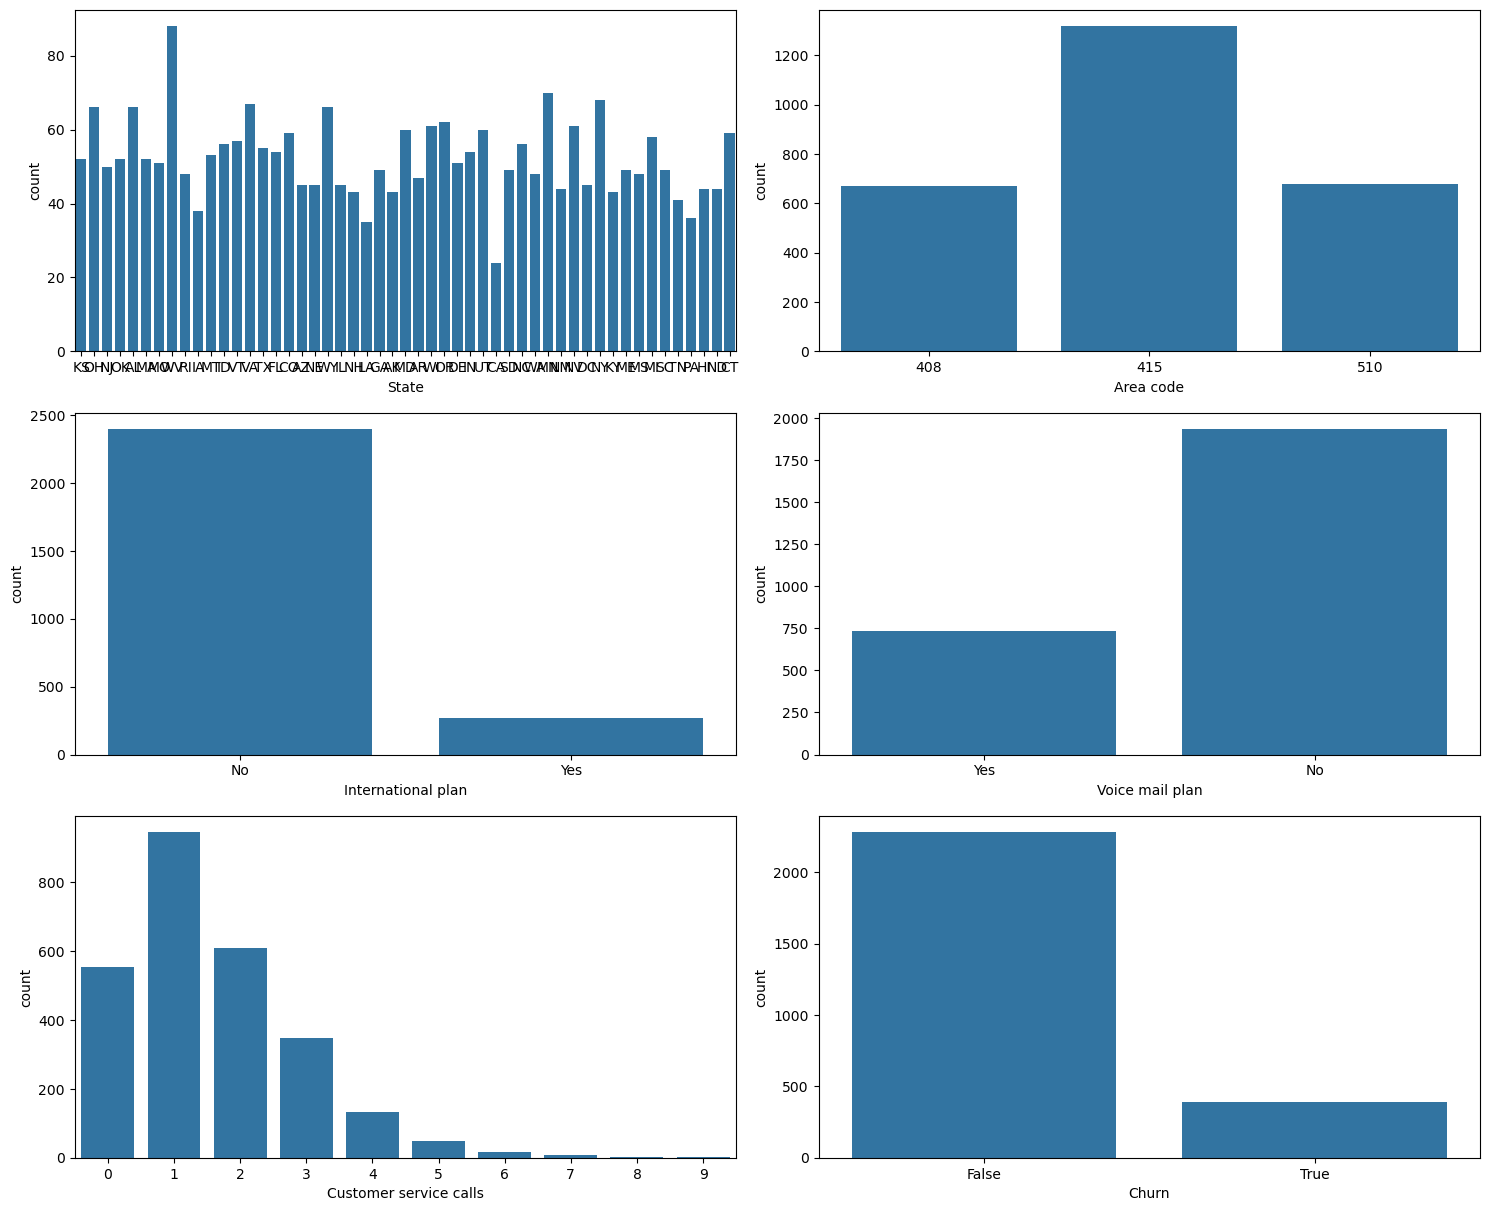

In [21]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in categorical_cols:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=X, x=col)
    plot_num += 1
    plt.tight_layout()

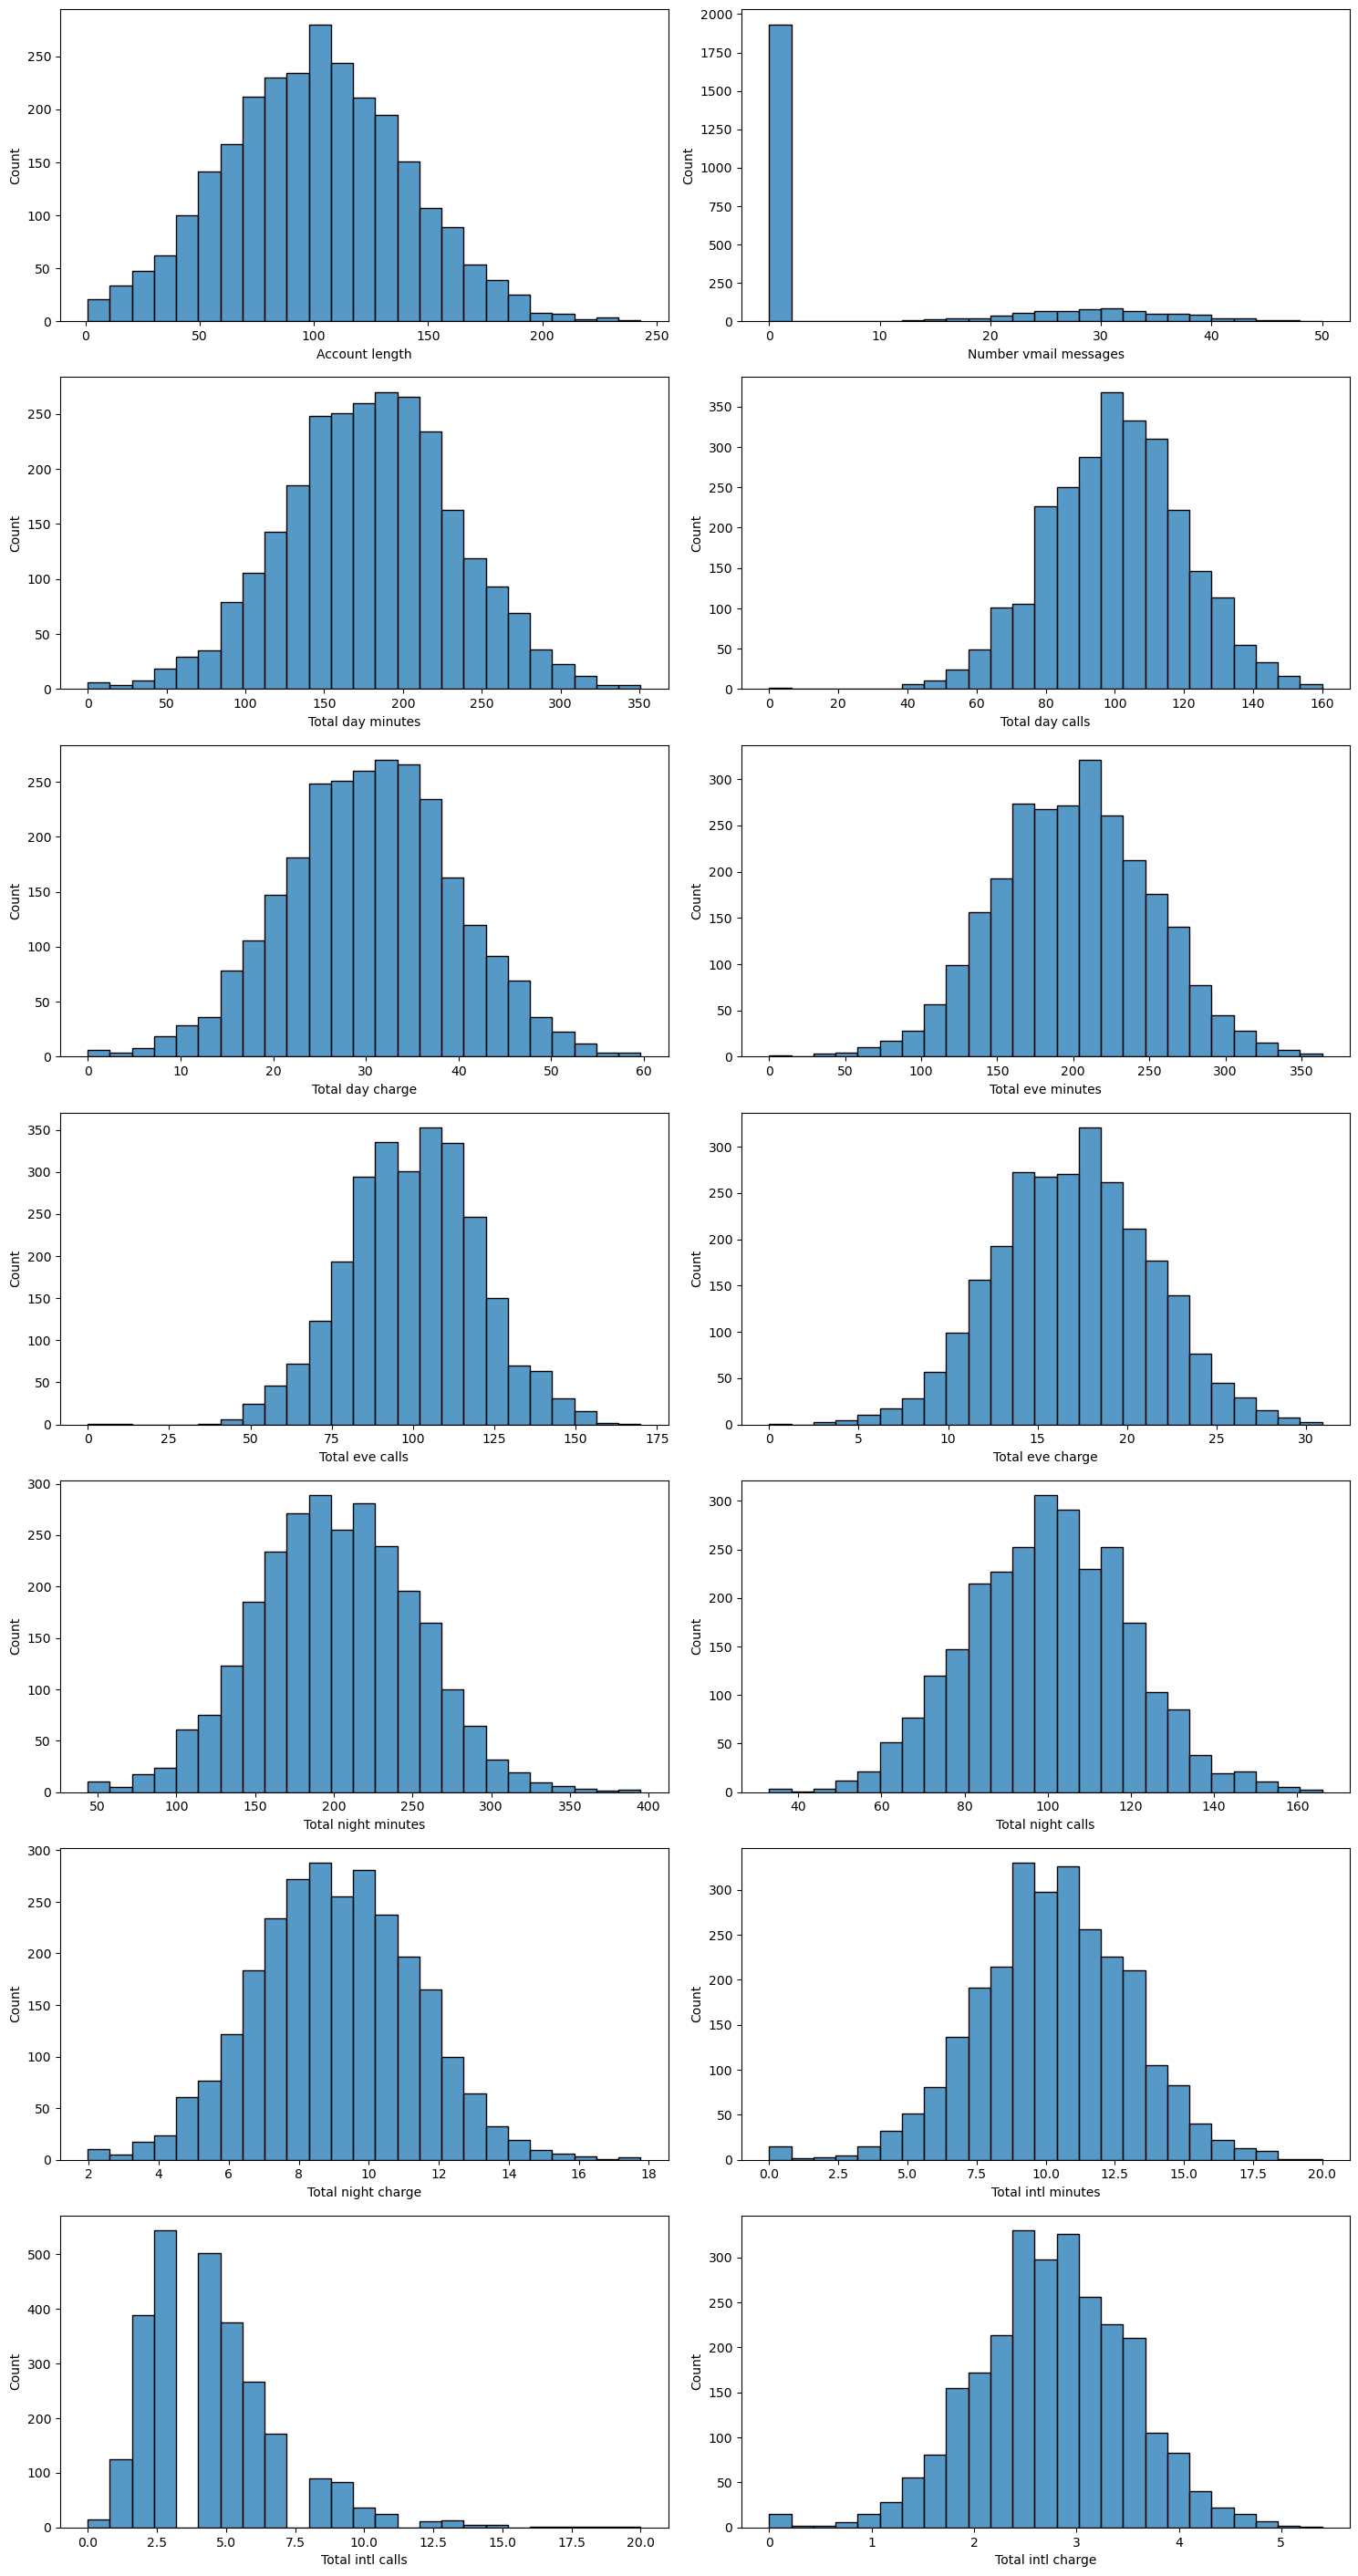

In [22]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in countable_cols:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=X, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

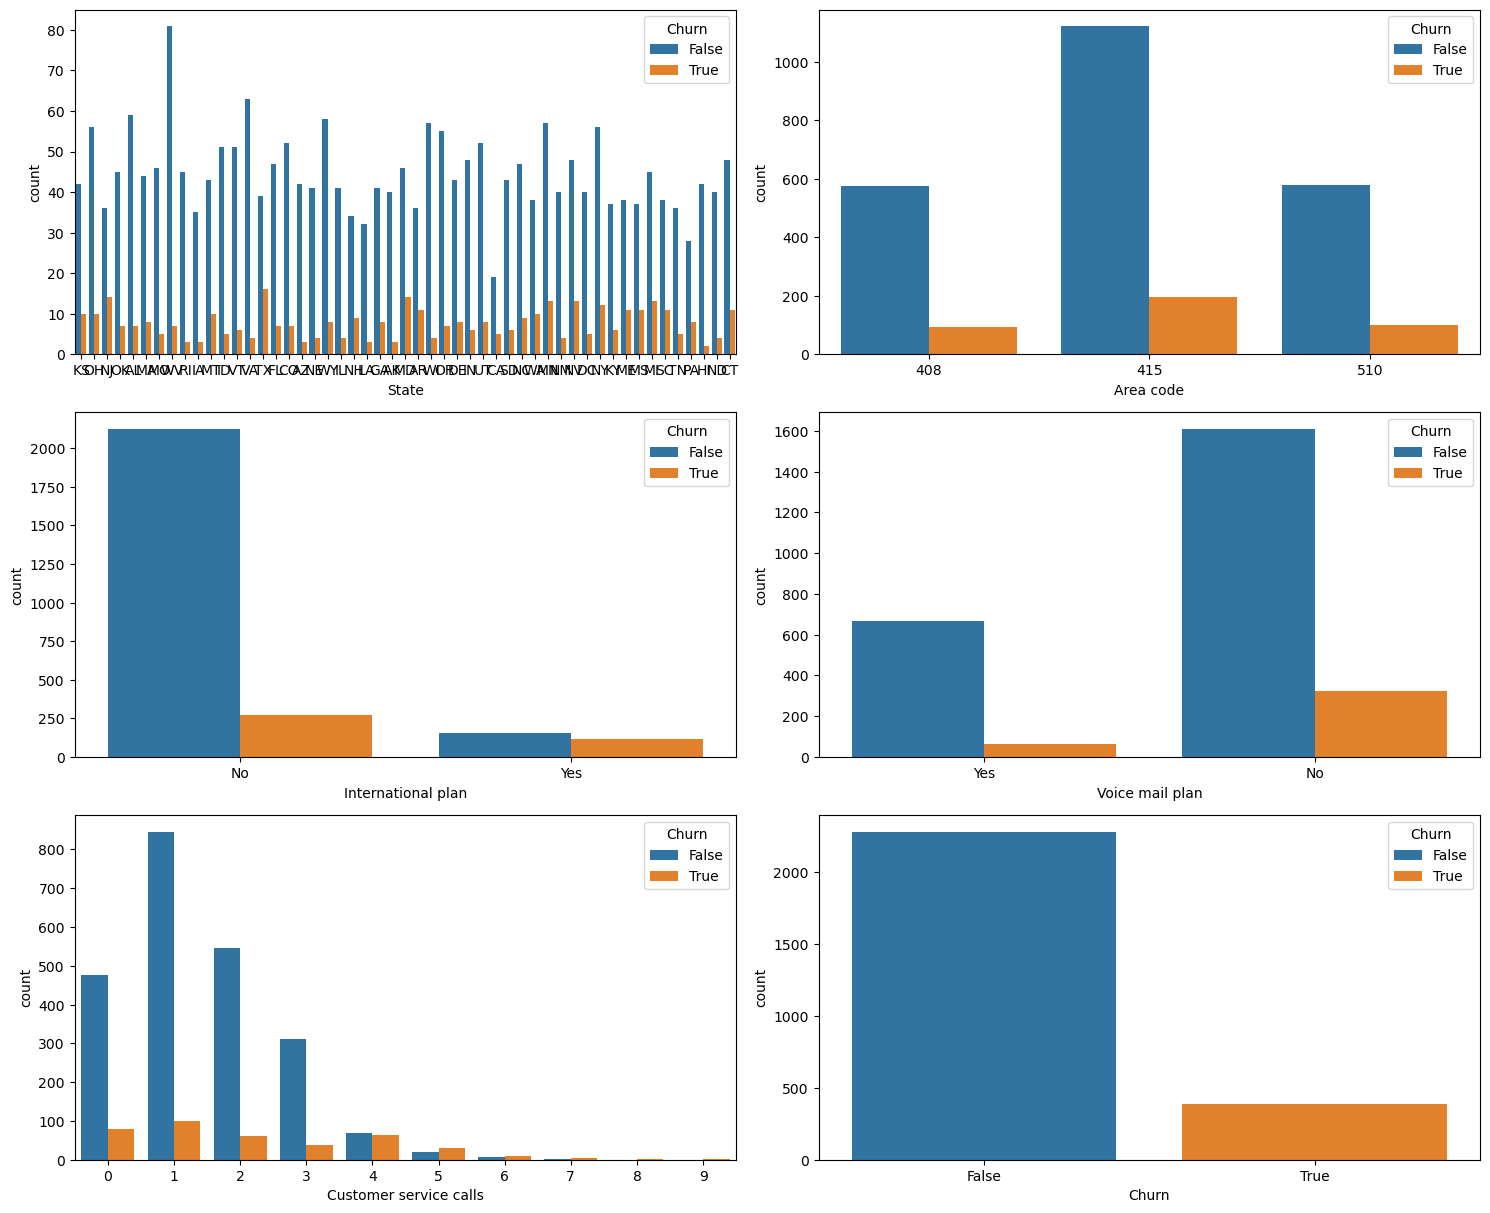

In [23]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in categorical_cols:
        plt.subplot(10,2,plot_num)
        sns.countplot(data=X, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

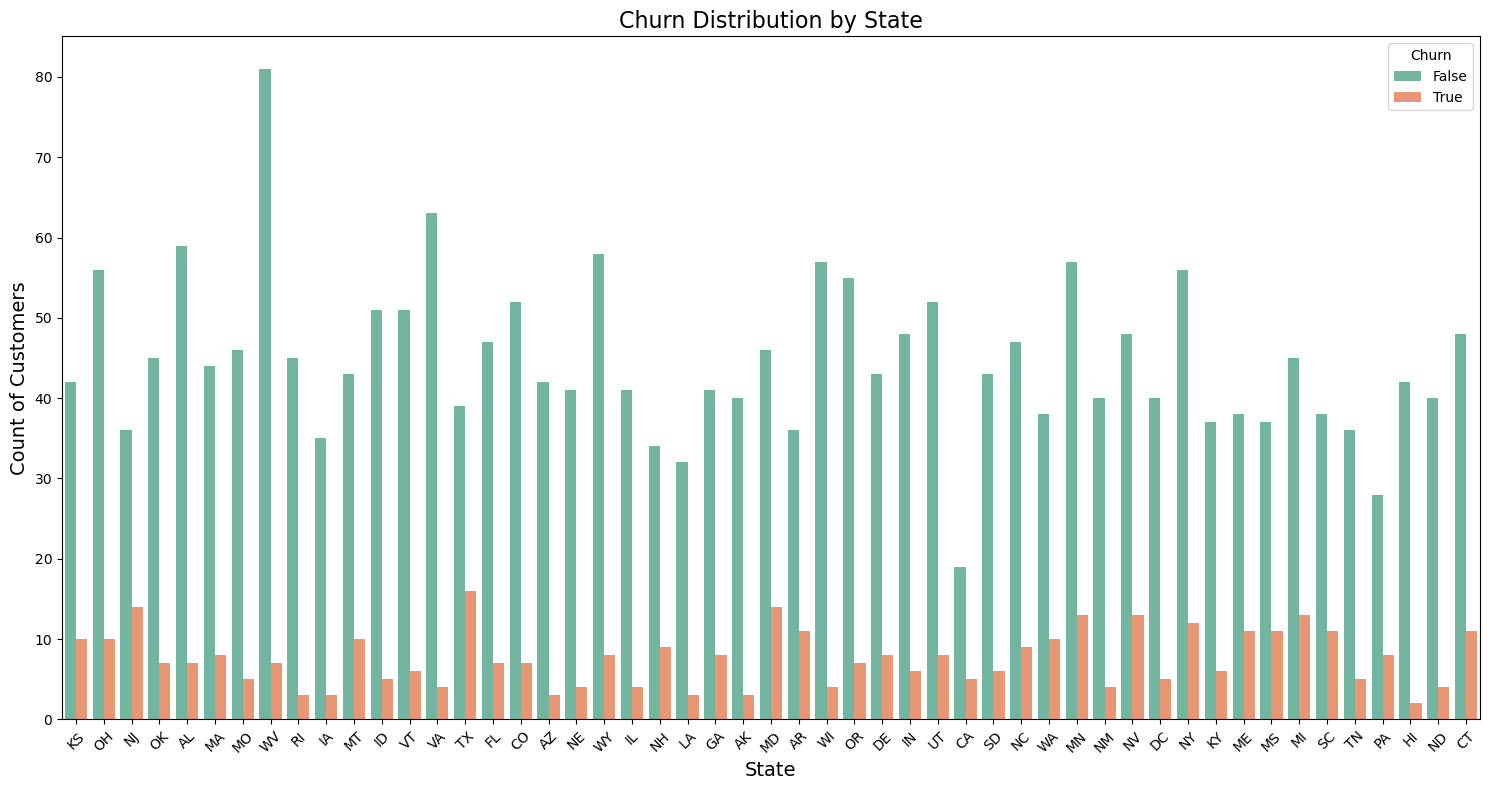

In [24]:
plt.figure(figsize=(15, 8))
sns.countplot(x='State', hue='Churn', data=X, palette='Set2')
plt.title('Churn Distribution by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

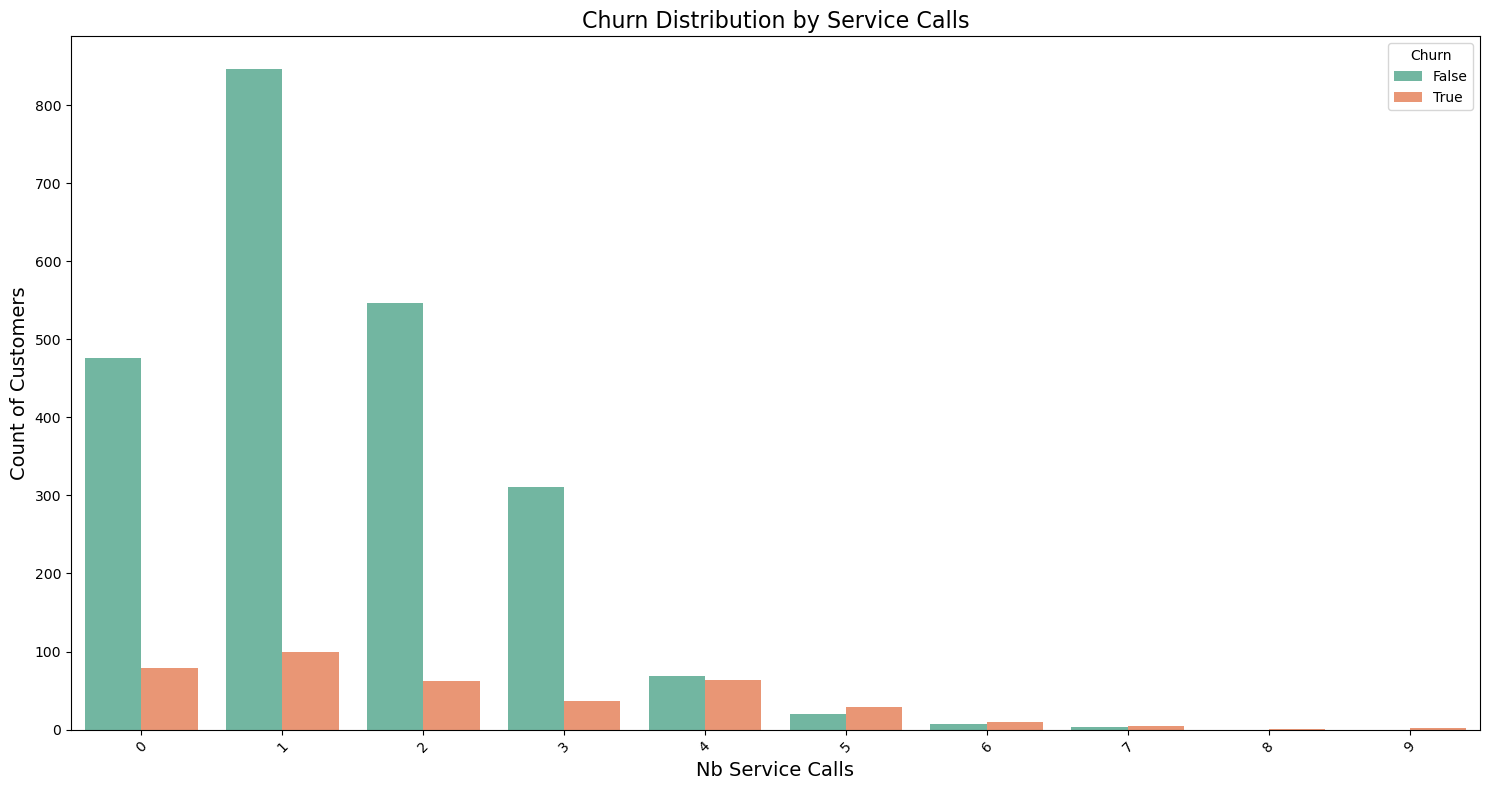

In [25]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Customer service calls', hue='Churn', data=X, palette='Set2')
plt.title('Churn Distribution by Service Calls', fontsize=16)
plt.xlabel('Nb Service Calls', fontsize=14)
plt.ylabel('Count of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Handling object columns :


In [27]:
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(X[col].unique())
    print("-" * 40)


Unique values in State:
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']
----------------------------------------
Unique values in Area code:
[415 408 510]
----------------------------------------
Unique values in International plan:
['No' 'Yes']
----------------------------------------
Unique values in Voice mail plan:
['Yes' 'No']
----------------------------------------
Unique values in Customer service calls:
[1 0 2 3 4 5 7 9 6 8]
----------------------------------------
Unique values in Churn:
[False  True]
----------------------------------------


In [28]:
X['Churn'] = X['Churn'].astype(int)
y['Churn'] = y['Churn'].astype(int)

In [29]:
X['International plan'] = X['International plan'].map({'No': 0, 'Yes': 1})
y['International plan'] = y['International plan'].map({'No': 0, 'Yes': 1})

In [30]:
X['Voice mail plan'] = X['Voice mail plan'].map({'No': 0, 'Yes': 1})
y['Voice mail plan'] = y['Voice mail plan'].map({'No': 0, 'Yes': 1})

In [31]:
encoder_state = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_area = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_states_X = encoder_state.fit_transform(X[['State']])
encoded_states_y = encoder_state.transform(y[['State']])

encoded_states_df_X = pd.DataFrame(encoded_states_X, columns=encoder_state.get_feature_names_out(['State']))
encoded_states_df_y = pd.DataFrame(encoded_states_y, columns=encoder_state.get_feature_names_out(['State']))

encoded_area_X = encoder_area.fit_transform(X[['Area code']])
encoded_area_y = encoder_area.transform(y[['Area code']])

encoded_area_df_X = pd.DataFrame(encoded_area_X, columns=encoder_area.get_feature_names_out(['Area code']))
encoded_area_df_y = pd.DataFrame(encoded_area_y, columns=encoder_area.get_feature_names_out(['Area code']))

X = X.drop(['State', 'Area code'], axis=1)
y = y.drop(['State', 'Area code'], axis=1)

X = pd.concat([X, encoded_states_df_X, encoded_area_df_X], axis=1)
y = pd.concat([y, encoded_states_df_y, encoded_area_df_y], axis=1)

print("X_encoded shape:", X.shape)
print("y_encoded shape:", y.shape)


X_encoded shape: (2666, 72)
y_encoded shape: (667, 72)


In [32]:
X.dtypes

Account length             int64
International plan         int64
Voice mail plan            int64
Number vmail messages      int64
Total day minutes        float64
                          ...   
State_WV                 float64
State_WY                 float64
Area code_408            float64
Area code_415            float64
Area code_510            float64
Length: 72, dtype: object

In [33]:
y.dtypes

Account length             int64
International plan         int64
Voice mail plan            int64
Number vmail messages      int64
Total day minutes        float64
                          ...   
State_WV                 float64
State_WY                 float64
Area code_408            float64
Area code_415            float64
Area code_510            float64
Length: 72, dtype: object

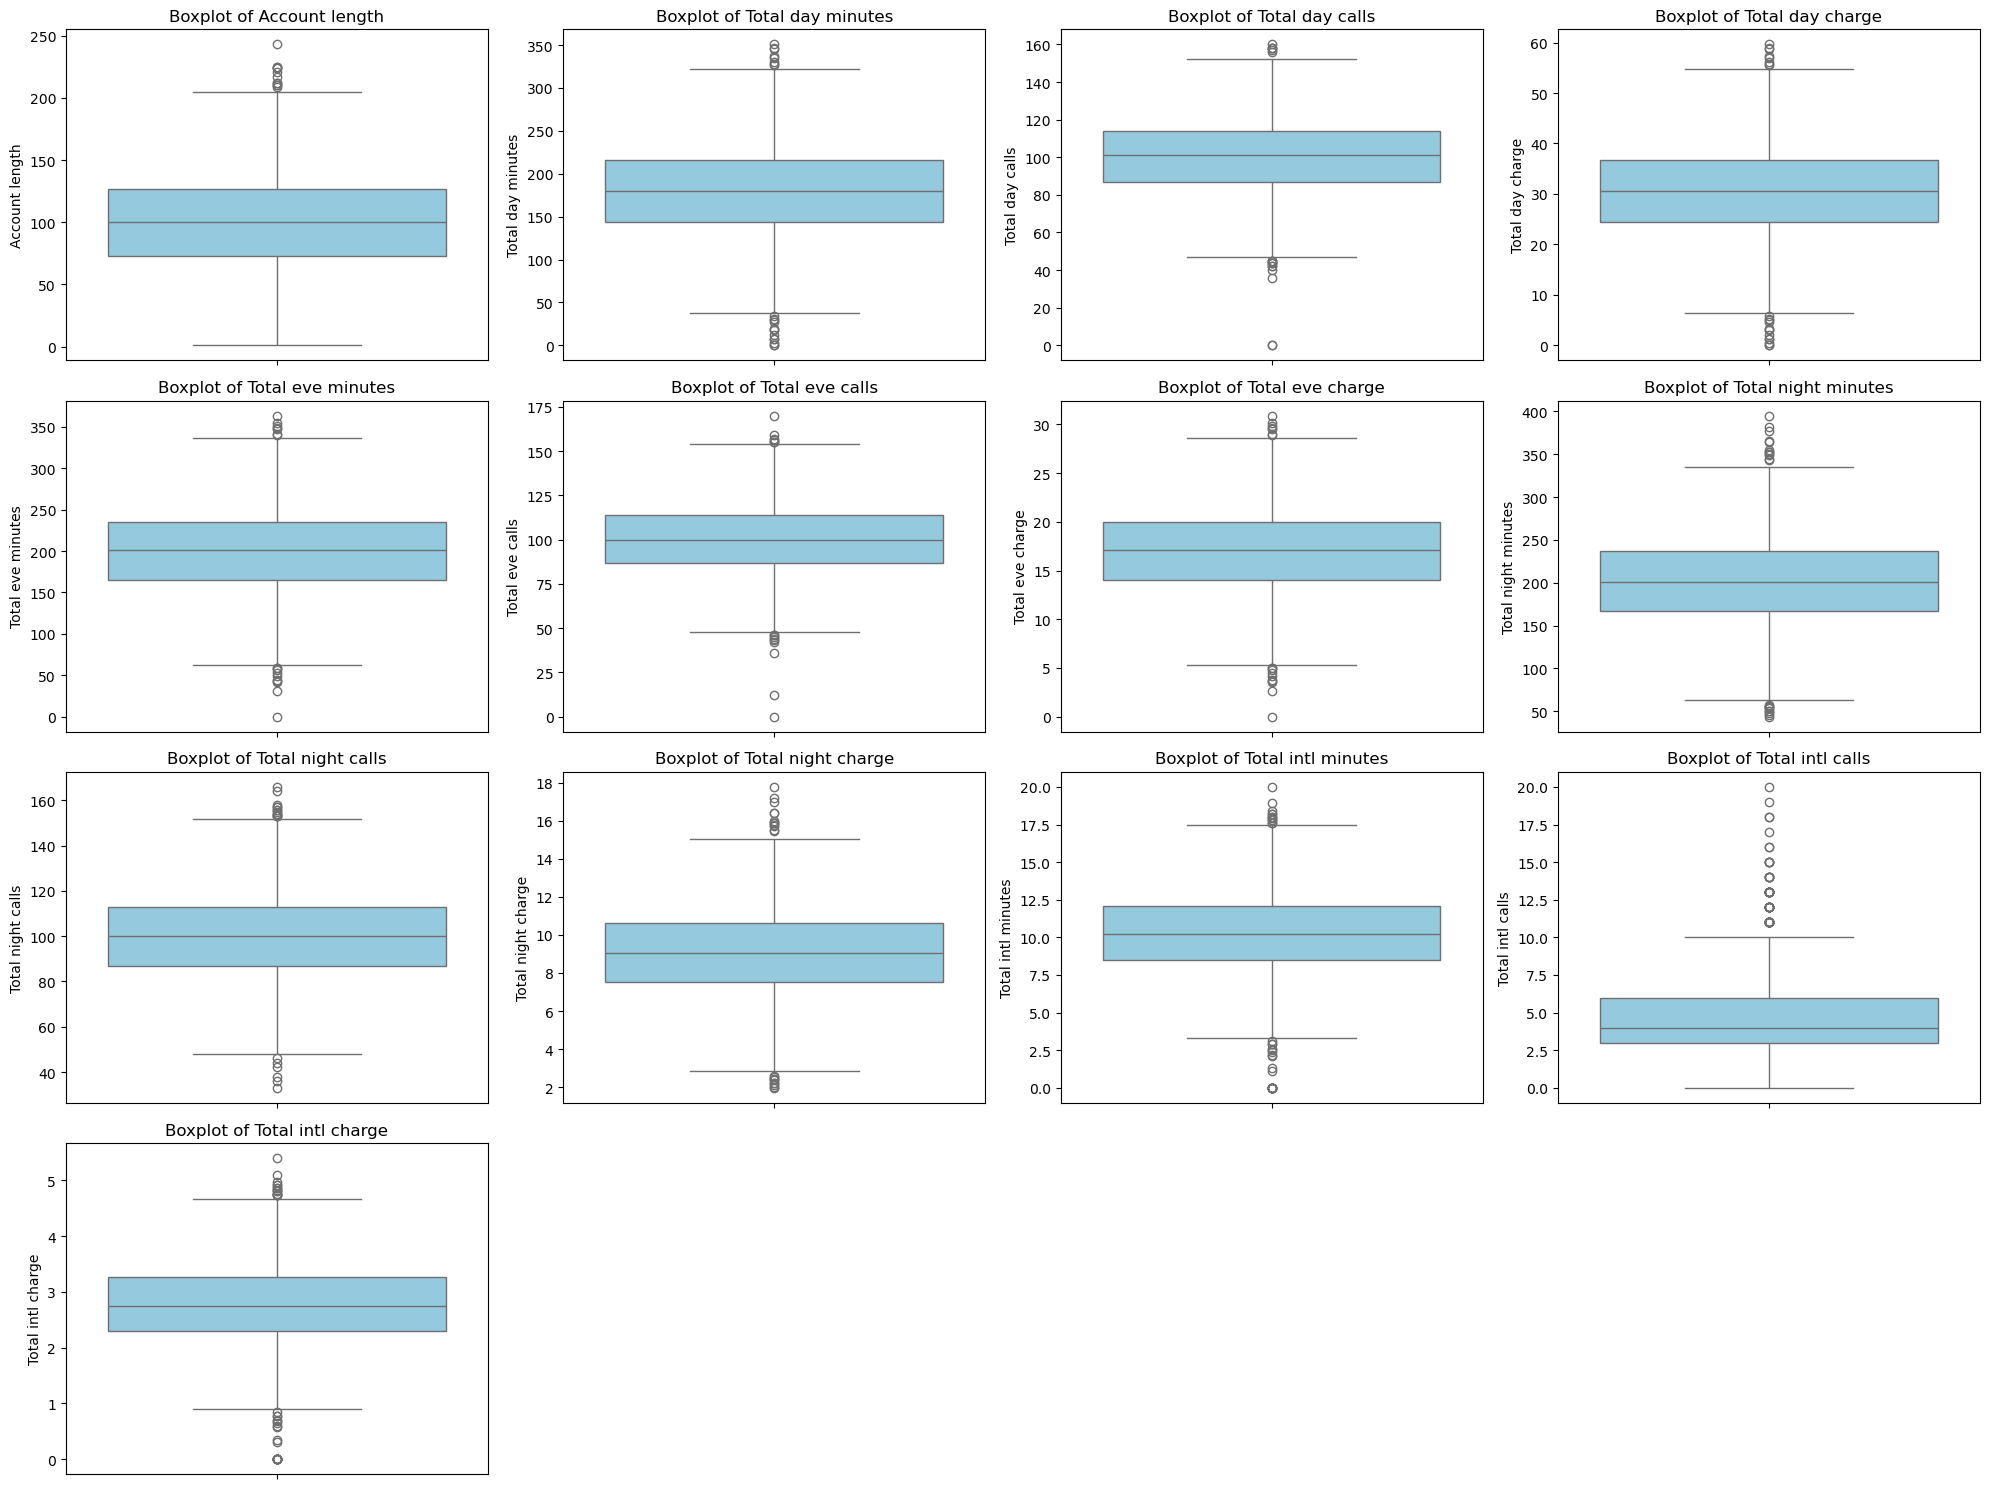

In [34]:
selected_columns = [
    'Account length','Total day minutes', 'Total day calls', 'Total day charge',
    'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge'
]
plt.figure(figsize=(20, 15))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=X, y=column, color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [35]:
selected_normal_columns=[]
selected_other_columns=[]
for column in selected_columns:
    result = anderson(X[column])
    if result.statistic < result.critical_values[2]:  # Comparaison avec le seuil de 5%
        print(f"{column} : Distribution normale (Anderson-Darling, stat={result.statistic:.3f})")
        selected_normal_columns.append(column)
    else:
        print(f"{column} : Distribution non normale (Anderson-Darling, stat={result.statistic:.3f})")
        selected_other_columns.append(column)


Account length : Distribution normale (Anderson-Darling, stat=0.299)
Total day minutes : Distribution normale (Anderson-Darling, stat=0.250)
Total day calls : Distribution normale (Anderson-Darling, stat=0.641)
Total day charge : Distribution normale (Anderson-Darling, stat=0.250)
Total eve minutes : Distribution normale (Anderson-Darling, stat=0.338)
Total eve calls : Distribution normale (Anderson-Darling, stat=0.533)
Total eve charge : Distribution normale (Anderson-Darling, stat=0.340)
Total night minutes : Distribution normale (Anderson-Darling, stat=0.250)
Total night calls : Distribution normale (Anderson-Darling, stat=0.749)
Total night charge : Distribution normale (Anderson-Darling, stat=0.253)
Total intl minutes : Distribution non normale (Anderson-Darling, stat=1.455)
Total intl calls : Distribution non normale (Anderson-Darling, stat=66.072)
Total intl charge : Distribution non normale (Anderson-Darling, stat=1.480)


In [36]:
z_scores = zscore(X[selected_normal_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
print(f"Shape after removing outliers: {X.shape}")



Shape after removing outliers: (2625, 72)


In [37]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

X = remove_outliers(X, selected_other_columns)

print(f"Shape after removing outliers: {X.shape}")

Shape after removing outliers: (2521, 72)


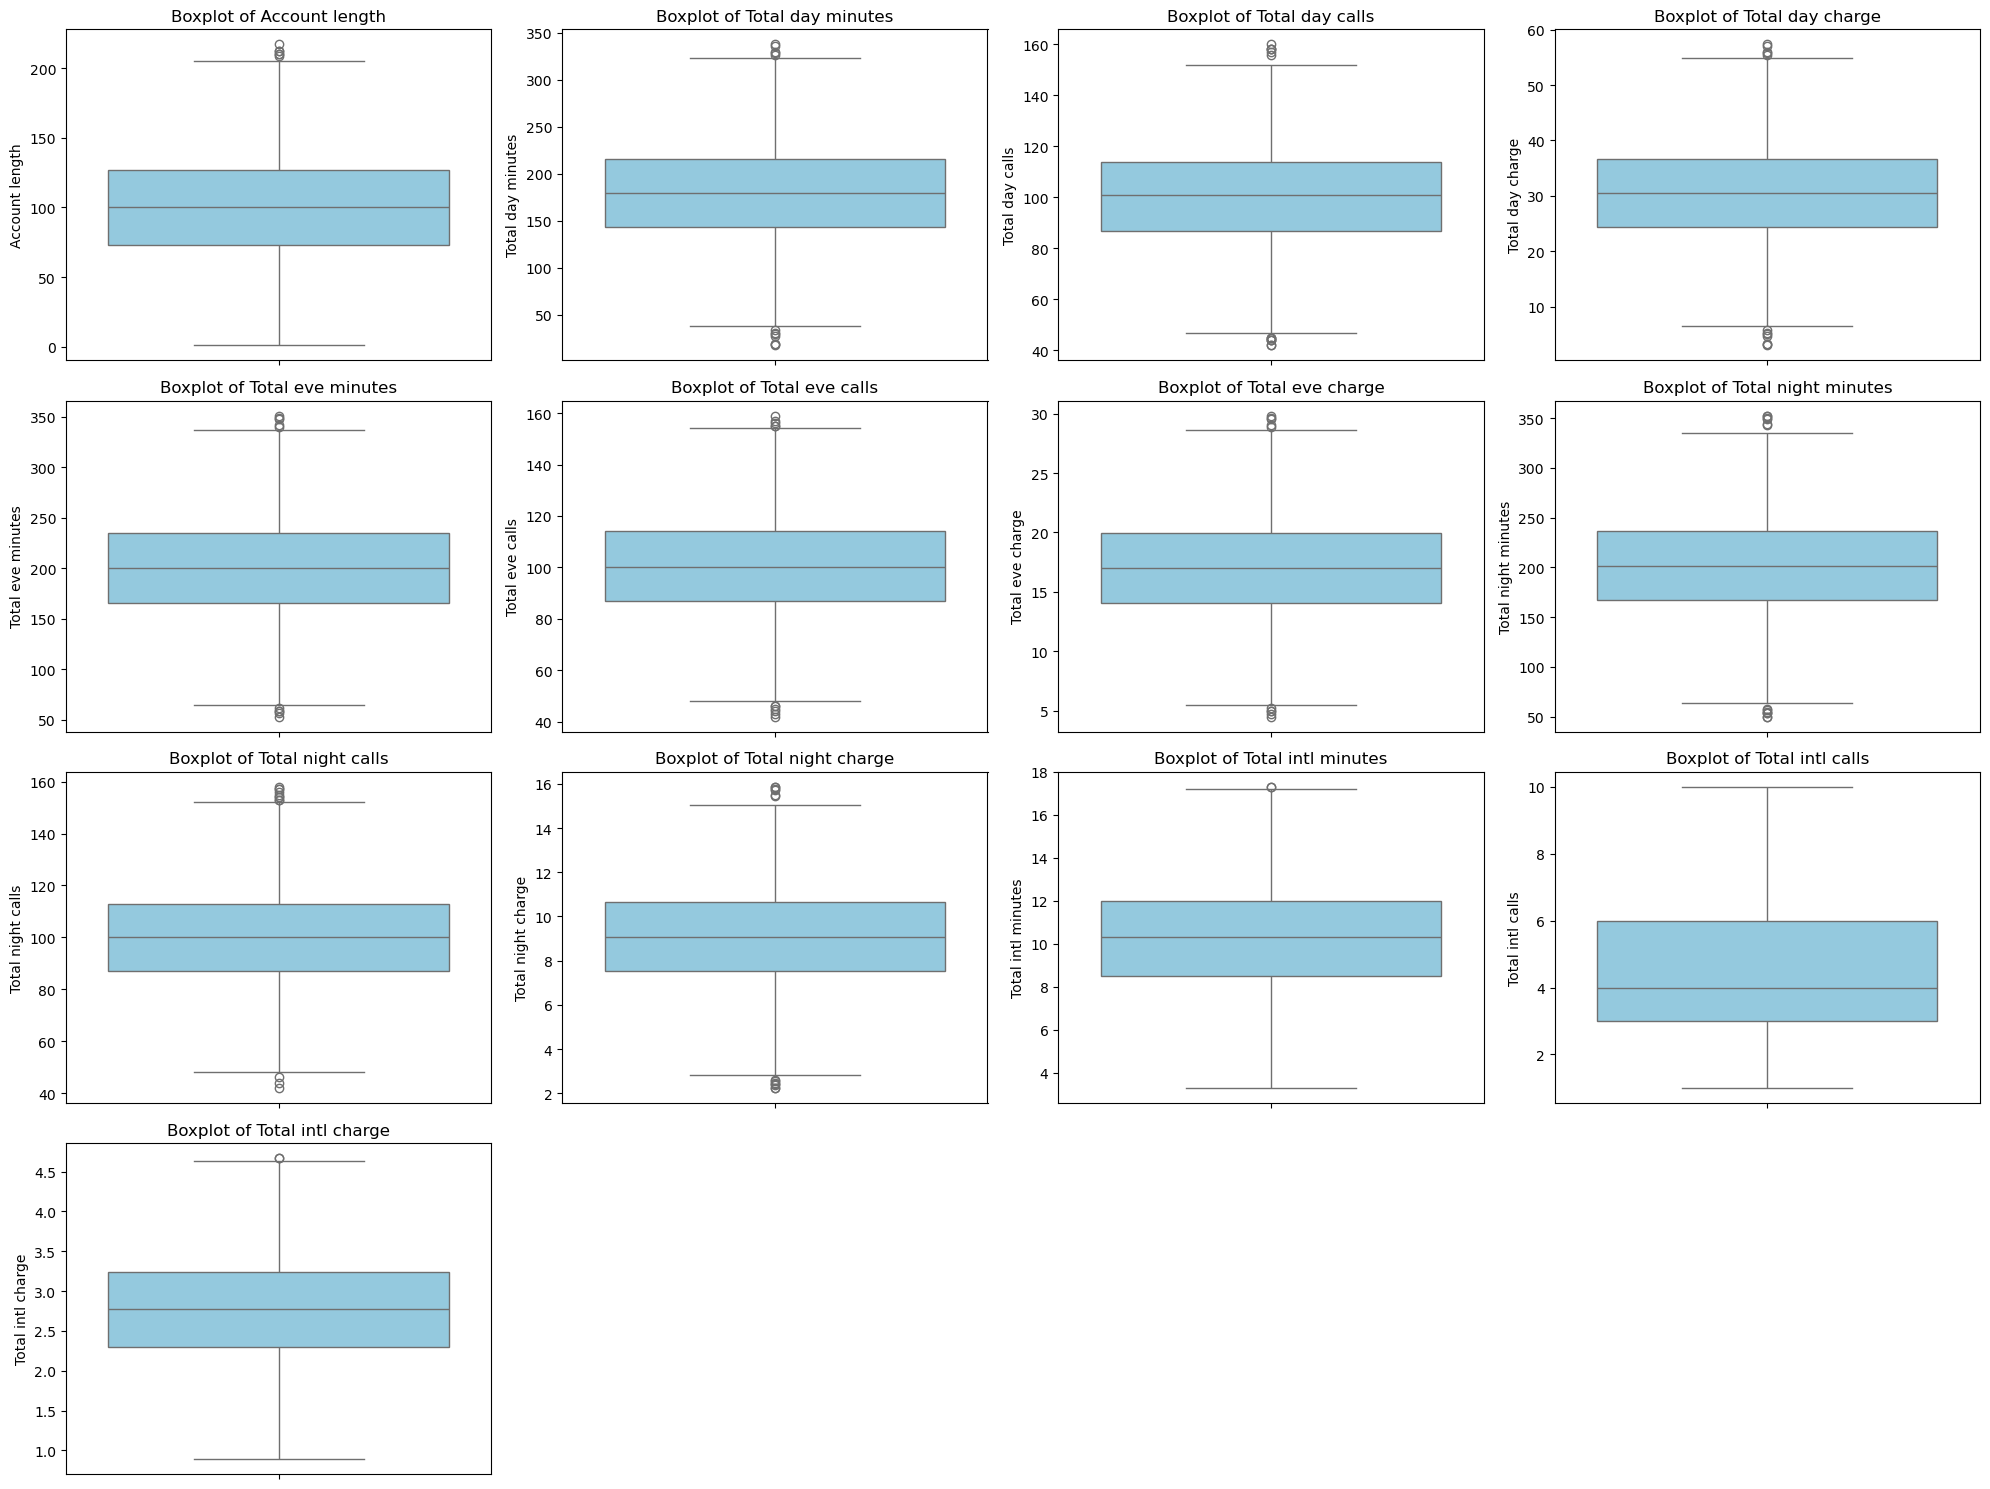

In [38]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=X, y=column, color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

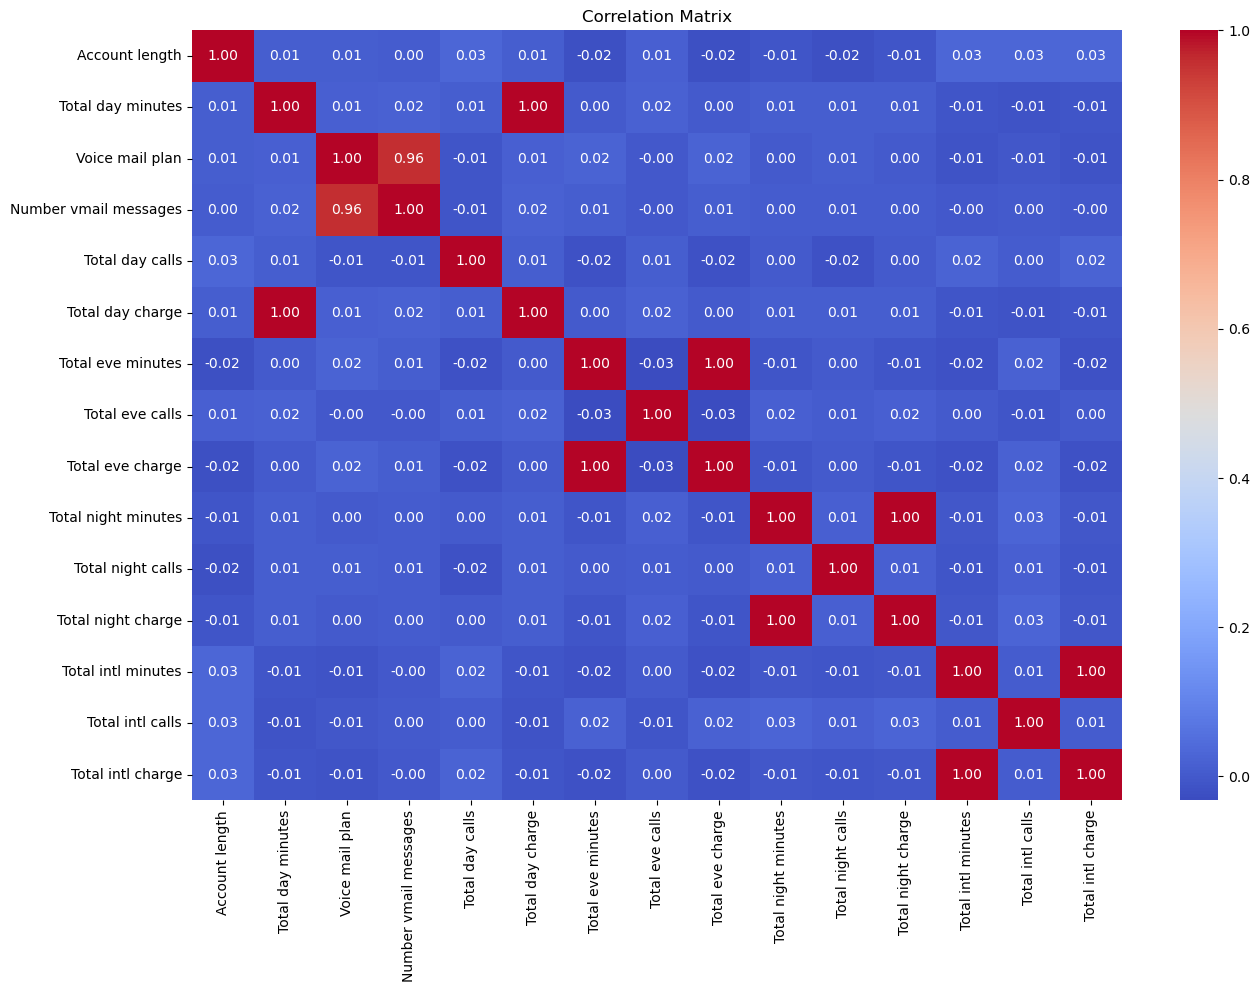

In [39]:
selected_columns2 = [
    'Account length','Total day minutes','Voice mail plan','Number vmail messages', 'Total day calls', 'Total day charge',
    'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge'
]
corr = X[selected_columns2].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [40]:
X['Total calls'] = X['Total day calls'] + X['Total eve calls'] + X['Total night calls'] + X['Total intl calls']
X['Total charge'] = X['Total day charge'] + X['Total eve charge'] + X['Total night charge'] + X['Total intl charge']

y['Total calls'] = y['Total day calls'] + y['Total eve calls'] + y['Total night calls'] + y['Total intl calls']
y['Total charge'] = y['Total day charge'] + y['Total eve charge'] + y['Total night charge'] + y['Total intl charge']
X['CScalls Rate'] = X['Customer service calls'] / X['Account length']
y['CScalls Rate'] = y['Customer service calls'] / y['Account length']


In [41]:
correlated_columns = ['Total day minutes',
                      'Total eve minutes',
                      'Total night minutes',
                      'Total intl minutes',
                      'Voice mail plan']
X.drop(correlated_columns, axis=1, inplace=True)
y.drop(correlated_columns, axis=1, inplace=True)

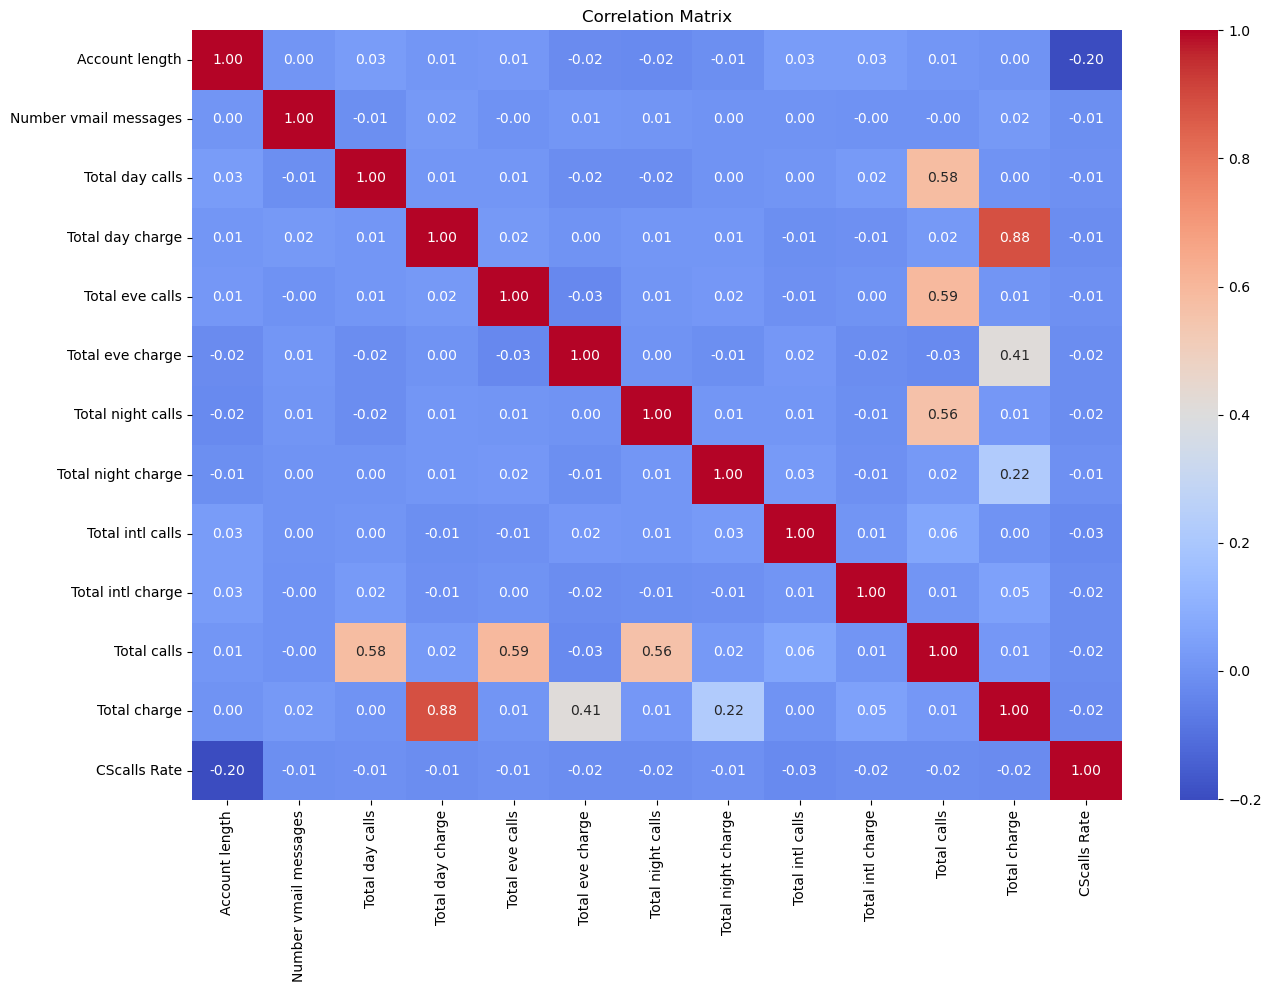

In [42]:
selected_columns1 = [
    'Account length','Number vmail messages', 'Total day calls', 'Total day charge',
    'Total eve calls', 'Total eve charge',
     'Total night calls', 'Total night charge',
     'Total intl calls', 'Total intl charge', 'Total calls' , 'Total charge','CScalls Rate'
]
corr = X[selected_columns1].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2521 entries, 0 to 2665
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2521 non-null   int64  
 1   International plan      2521 non-null   int64  
 2   Number vmail messages   2521 non-null   int64  
 3   Total day calls         2521 non-null   int64  
 4   Total day charge        2521 non-null   float64
 5   Total eve calls         2521 non-null   int64  
 6   Total eve charge        2521 non-null   float64
 7   Total night calls       2521 non-null   int64  
 8   Total night charge      2521 non-null   float64
 9   Total intl calls        2521 non-null   int64  
 10  Total intl charge       2521 non-null   float64
 11  Customer service calls  2521 non-null   int64  
 12  Churn                   2521 non-null   int32  
 13  State_AK                2521 non-null   float64
 14  State_AL                2521 non-null   float

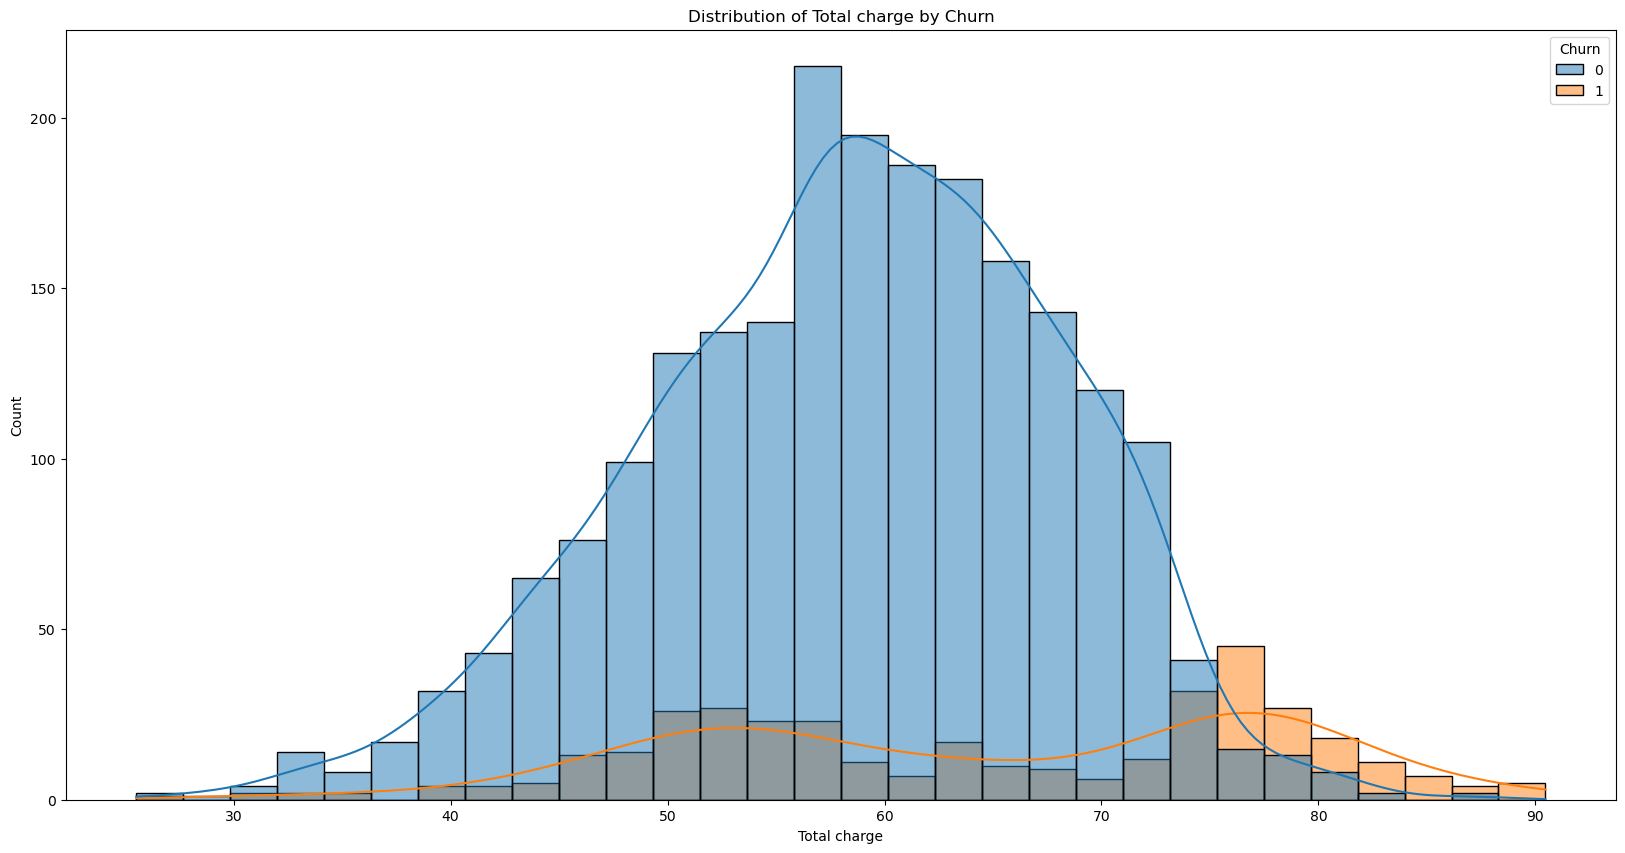

In [44]:
plt.figure(figsize=(20, 10))
sns.histplot(data=X, x='Total charge', hue='Churn', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total charge by Churn')
plt.show()

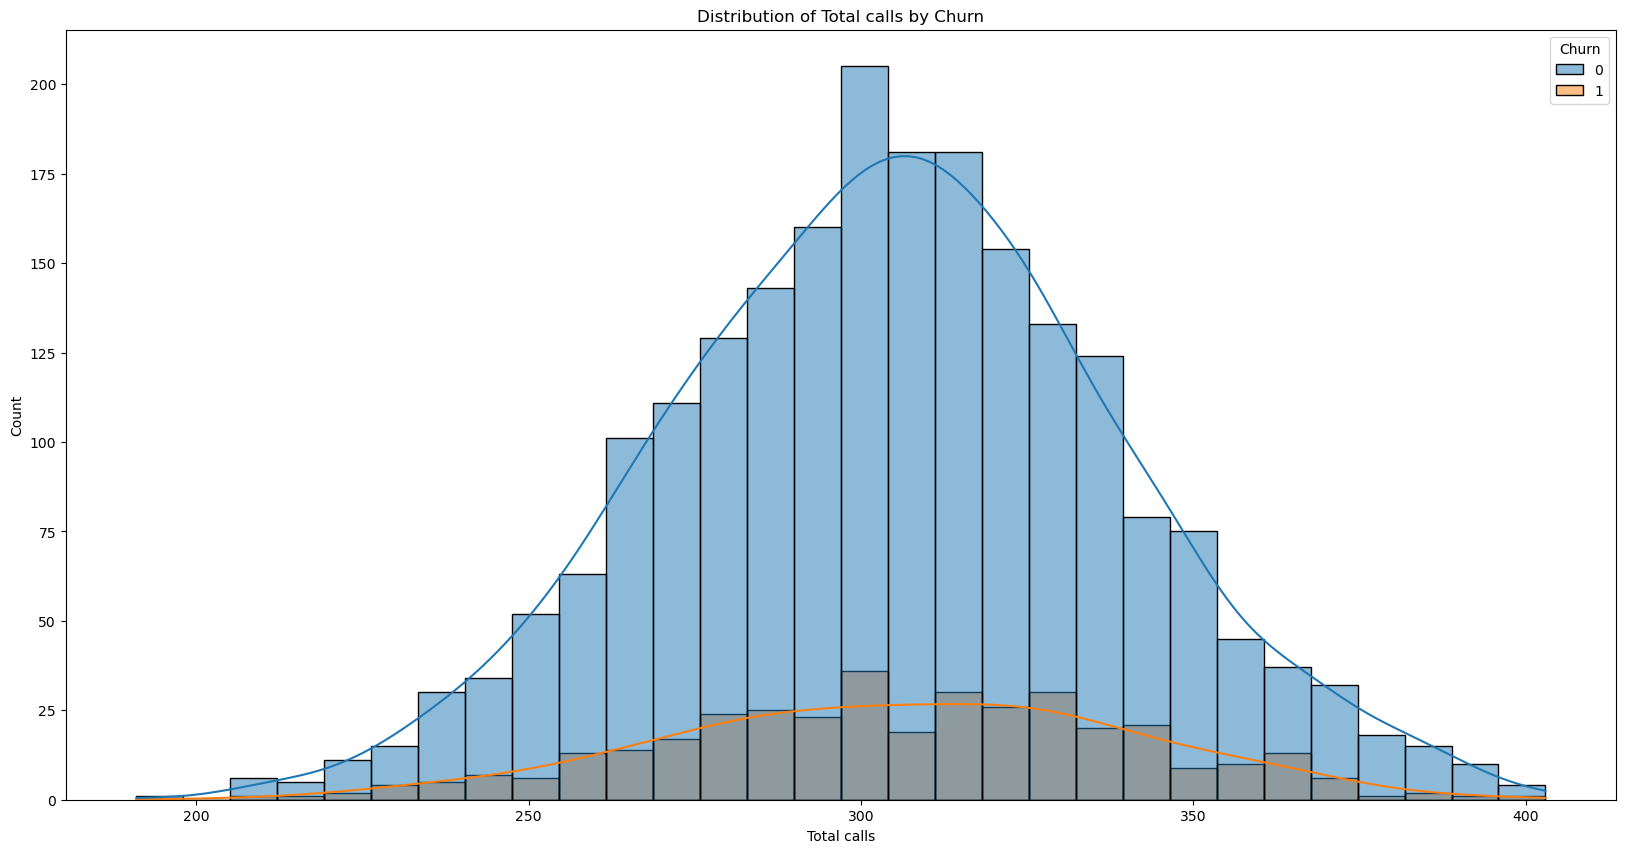

In [45]:
plt.figure(figsize=(20, 10))
sns.histplot(data=X, x='Total calls', hue='Churn', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total calls by Churn')
plt.show()

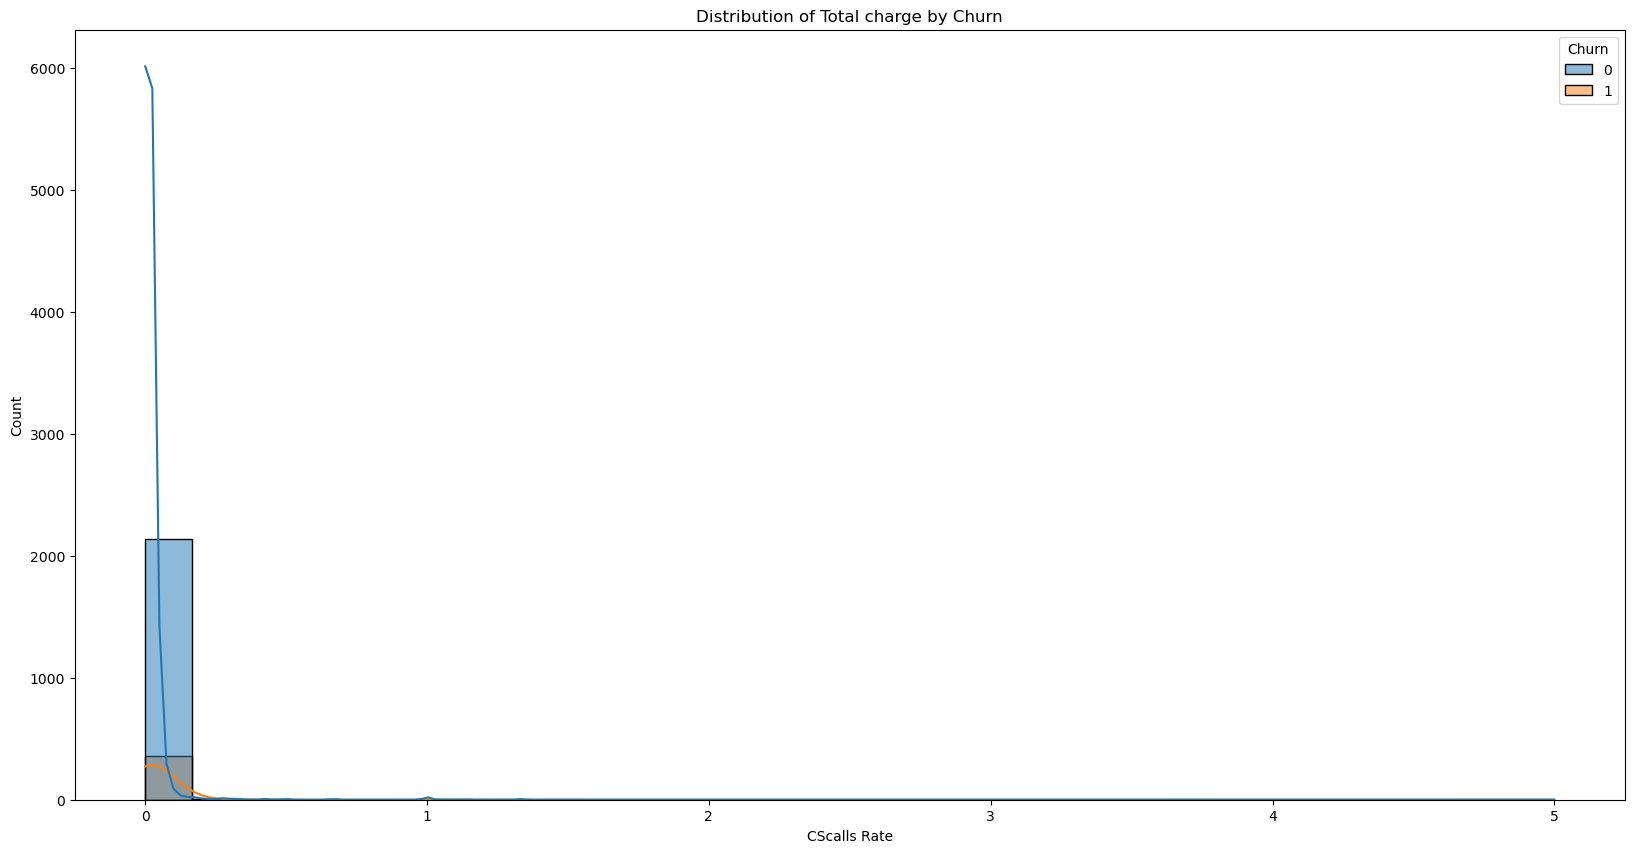

In [46]:
plt.figure(figsize=(20, 10))
sns.histplot(data=X, x='CScalls Rate', hue='Churn', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total charge by Churn')
plt.show()

In [47]:
X_train=X.drop(['Churn'],axis=1)
y_train=X['Churn']
X_test=y.drop(['Churn'],axis=1)
y_test=y['Churn']

In [48]:
desired_ratio = 30 / 70
smote_enn = SMOTEENN(sampling_strategy=desired_ratio, random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
y_resampled.value_counts()

Churn
0    1373
1     534
Name: count, dtype: int64

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


In [50]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Support Vector Machine": SVC(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier()


}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_resampled)

    y_pred = model.predict(X_test_scaled)


    print(f"{model_name} - Classification Report:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression - Classification Report:
[[420 152]
 [ 33  62]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       572
           1       0.29      0.65      0.40        95

    accuracy                           0.72       667
   macro avg       0.61      0.69      0.61       667
weighted avg       0.84      0.72      0.76       667

Support Vector Machine - Classification Report:
[[546  26]
 [ 57  38]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       572
           1       0.59      0.40      0.48        95

    accuracy                           0.88       667
   macro avg       0.75      0.68      0.70       667
weighted avg       0.86      0.88      0.87       667

Decision Tree - Classification Report:
[[550  22]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       572
           1       0.79      0.87   

C:\Users\Mega Pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBoost - Classification Report:
[[565   7]
 [ 17  78]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.92      0.82      0.87        95

    accuracy                           0.96       667
   macro avg       0.94      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667

Neural Network - Classification Report:
[[549  23]
 [ 55  40]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       572
           1       0.63      0.42      0.51        95

    accuracy                           0.88       667
   macro avg       0.77      0.69      0.72       667
weighted avg       0.87      0.88      0.87       667



C:\Users\Mega Pc\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_resampled)

    y_pred = model.predict(X_test_scaled)


    print(f"{model_name} - Classification Report:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Random Forest - Classification Report:
[[566   6]
 [ 40  55]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       572
           1       0.90      0.58      0.71        95

    accuracy                           0.93       667
   macro avg       0.92      0.78      0.83       667
weighted avg       0.93      0.93      0.92       667

XGBoost - Classification Report:
[[565   7]
 [ 17  78]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.92      0.82      0.87        95

    accuracy                           0.96       667
   macro avg       0.94      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667



In [52]:

def objective_rf(trial):
    # Hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 500, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    model.fit(X_train_scaled,y_resampled)

    y_test_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_pred)
    return accuracy

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

print("Best hyperparameters for Random Forest:", study_rf.best_params)

best_params_rf = study_rf.best_params
best_rf_model = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_features=best_params_rf['max_features'],
    random_state=42
)
best_rf_model.fit(X_train_scaled,y_resampled)

y_pred_rf = best_rf_model.predict(X_test_scaled)
print("Random Forest - Best Model Classification Report:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


[I 2024-12-12 22:24:45,026] A new study created in memory with name: no-name-4526d37c-1ccb-406c-867d-f21d3a877d60
[I 2024-12-12 22:24:45,761] Trial 0 finished with value: 0.9055472263868066 and parameters: {'n_estimators': 400, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 0 with value: 0.9055472263868066.
[I 2024-12-12 22:24:48,487] Trial 1 finished with value: 0.9685157421289355 and parameters: {'n_estimators': 300, 'max_depth': 25, 'min_samples_split': 14, 'min_samples_leaf': 20, 'max_features': None}. Best is trial 1 with value: 0.9685157421289355.
[I 2024-12-12 22:24:48,836] Trial 2 finished with value: 0.9235382308845578 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.9685157421289355.
[I 2024-12-12 22:24:49,508] Trial 3 finished with value: 0.9325337331334332 and parameters: {'n_estimators': 250, 'max_depth': 15, 

Best hyperparameters for Random Forest: {'n_estimators': 500, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': None}
Random Forest - Best Model Classification Report:
[[566   6]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       572
           1       0.93      0.87      0.90        95

    accuracy                           0.97       667
   macro avg       0.96      0.93      0.94       667
weighted avg       0.97      0.97      0.97       667

Random Forest Accuracy: 0.9730134932533733


In [53]:

def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        #use_label_encoder=False,
        random_state=42
    )

    model.fit(X_train_scaled, y_resampled)

    y_test_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_pred)
    return accuracy

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best hyperparameters for XGBoost:", study_xgb.best_params)

best_params_xgb = study_xgb.best_params
best_xgb_model = XGBClassifier(
    n_estimators=best_params_xgb['n_estimators'],
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth'],
    min_child_weight=best_params_xgb['min_child_weight'],
    subsample=best_params_xgb['subsample'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    gamma=best_params_xgb['gamma'],
    #use_label_encoder=False,
    random_state=42
)
best_xgb_model.fit(X_train_scaled, y_resampled)

y_pred_xgb = best_xgb_model.predict(X_test_scaled)
print("XGBoost - Best Model Classification Report:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


[I 2024-12-12 22:27:54,427] A new study created in memory with name: no-name-73cb7287-924a-4d5e-b89b-99e90cda0e13
[I 2024-12-12 22:27:54,527] Trial 0 finished with value: 0.9625187406296851 and parameters: {'n_estimators': 250, 'learning_rate': 0.07225598650203352, 'max_depth': 4, 'min_child_weight': 8, 'subsample': 0.975969100727659, 'colsample_bytree': 0.8680085906912478, 'gamma': 4.262441357023635}. Best is trial 0 with value: 0.9625187406296851.
[I 2024-12-12 22:27:54,578] Trial 1 finished with value: 0.9355322338830585 and parameters: {'n_estimators': 50, 'learning_rate': 0.013307416455132458, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.834874103478566, 'colsample_bytree': 0.7322260343429046, 'gamma': 2.8292607484980294}. Best is trial 0 with value: 0.9625187406296851.
[I 2024-12-12 22:27:54,626] Trial 2 finished with value: 0.9580209895052474 and parameters: {'n_estimators': 50, 'learning_rate': 0.05917574417137289, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.

Best hyperparameters for XGBoost: {'n_estimators': 300, 'learning_rate': 0.027715462475143303, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.9689423029362563, 'colsample_bytree': 0.9736920815225867, 'gamma': 3.8224724863487536}
XGBoost - Best Model Classification Report:
[[567   5]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       572
           1       0.94      0.87      0.91        95

    accuracy                           0.97       667
   macro avg       0.96      0.93      0.95       667
weighted avg       0.97      0.97      0.97       667

XGBoost Accuracy: 0.974512743628186


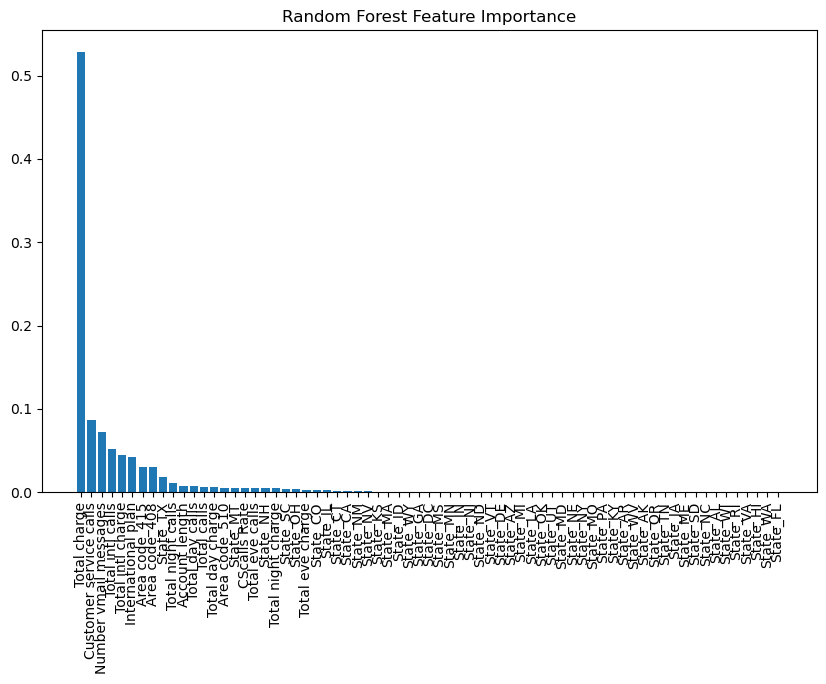

['Total charge', 'Customer service calls', 'Number vmail messages', 'Total intl calls', 'Total intl charge', 'International plan', 'Area code_415', 'Area code_408', 'State_TX', 'Total night calls', 'Account length', 'Total day calls', 'Total calls', 'Total day charge', 'Area code_510', 'State_MT', 'CScalls Rate', 'Total eve calls', 'State_NH', 'Total night charge', 'State_SC', 'State_OH', 'Total eve charge', 'State_CO', 'State_IL', 'State_CT', 'State_CA', 'State_NM', 'State_NV', 'State_KS', 'State_MA', 'State_ID', 'State_WY', 'State_GA', 'State_DC', 'State_MS', 'State_MN', 'State_IN', 'State_NJ', 'State_ND', 'State_VT', 'State_DE', 'State_AZ', 'State_MI', 'State_LA', 'State_OK', 'State_UT', 'State_MD', 'State_NE', 'State_NY', 'State_MO', 'State_PA', 'State_KY', 'State_AR', 'State_WV', 'State_AK', 'State_OR', 'State_TN', 'State_IA', 'State_ME', 'State_SD', 'State_NC', 'State_AL', 'State_WI', 'State_RI', 'State_VA', 'State_HI', 'State_WA', 'State_FL']


In [54]:
features = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
best_rf_model.fit(X_train_scaled, y_resampled)
rf_importances = best_rf_model.feature_importances_
sorted_indices = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), rf_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(features)[sorted_indices], rotation=90)
plt.title("Random Forest Feature Importance")
plt.show()
feature_names = X_train.columns.tolist()

sorted_idx = rf_importances.argsort()[::-1]

sorted_feature_names = [feature_names[i] for i in sorted_idx]

print(sorted_feature_names)


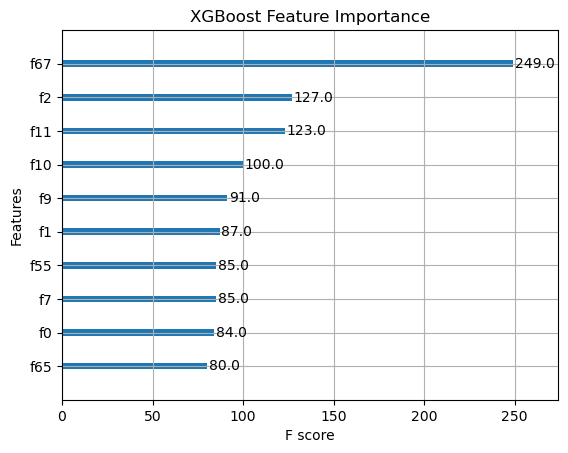

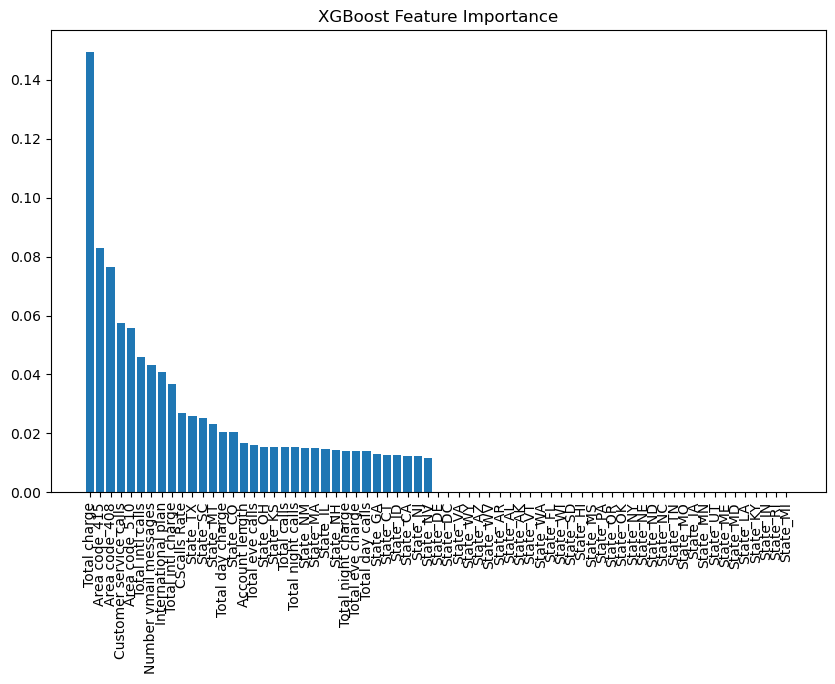

Feature Importance Gain
['Total charge', 'Area code_415', 'Area code_408', 'Customer service calls', 'Area code_510', 'Total intl calls', 'Number vmail messages', 'International plan', 'Total intl charge', 'CScalls Rate', 'State_TX', 'State_SC', 'State_MT', 'Total day charge', 'State_CO', 'Account length', 'Total eve calls', 'State_OH', 'State_KS', 'Total calls', 'Total night calls', 'State_NM', 'State_MA', 'State_IL', 'State_NH', 'Total night charge', 'Total eve charge', 'Total day calls', 'State_GA', 'State_CT', 'State_ID', 'State_CA', 'State_NJ', 'State_NV', 'State_DE', 'State_DC', 'State_VA', 'State_WY', 'State_AZ', 'State_WV', 'State_AR', 'State_AL', 'State_AK', 'State_VT', 'State_WA', 'State_FL', 'State_WI', 'State_SD', 'State_HI', 'State_MS', 'State_PA', 'State_OR', 'State_OK', 'State_NY', 'State_NE', 'State_ND', 'State_NC', 'State_TN', 'State_MO', 'State_IA', 'State_MN', 'State_UT', 'State_ME', 'State_MD', 'State_LA', 'State_KY', 'State_IN', 'State_RI', 'State_MI']


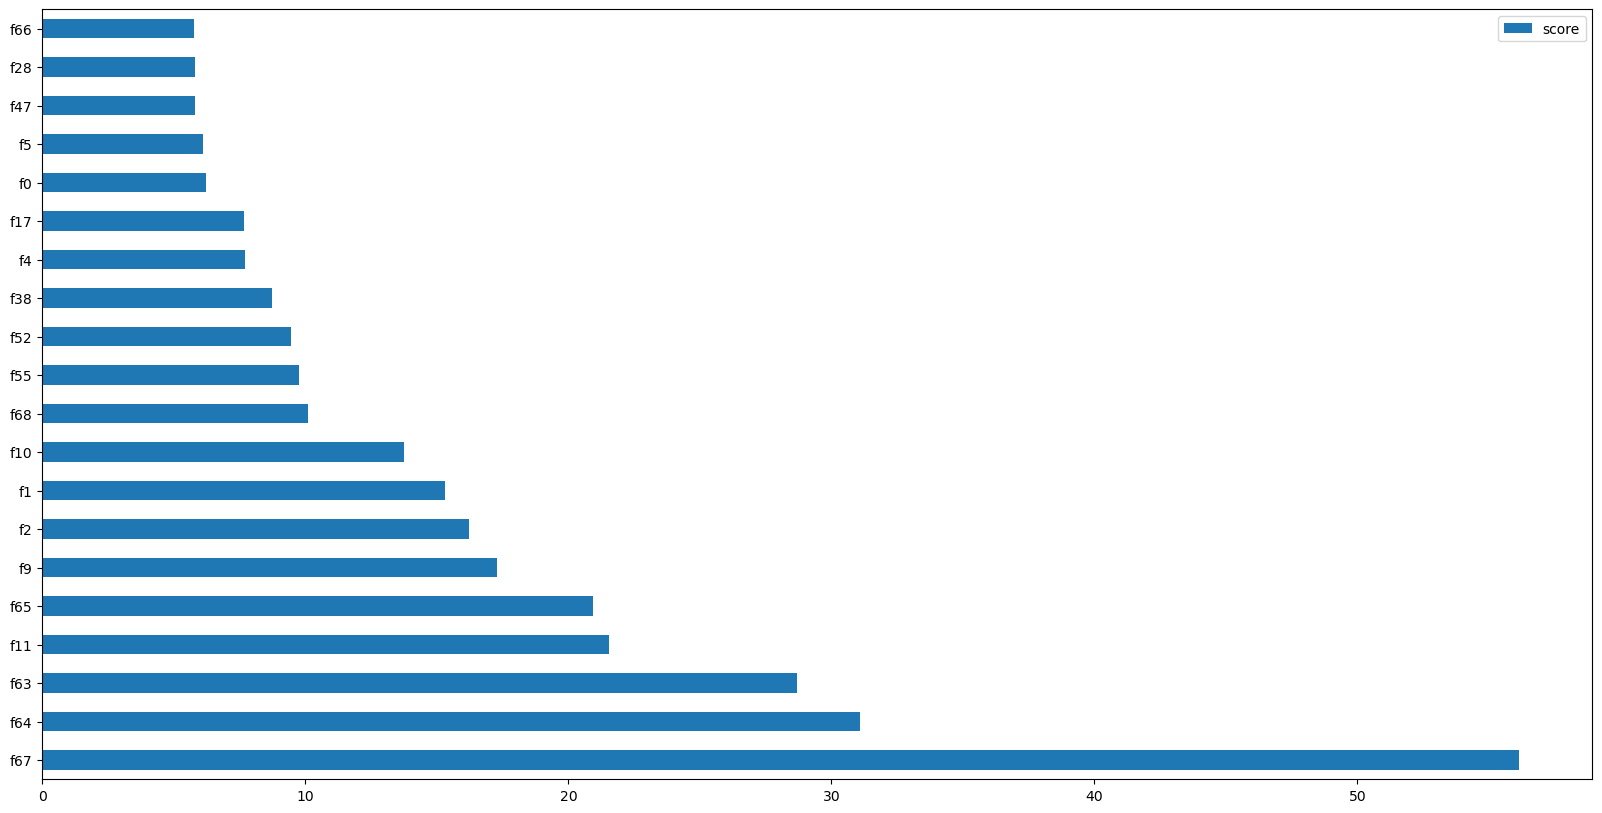

In [55]:
best_xgb_model.fit(X_train_scaled, y_resampled)
xgb.plot_importance(best_xgb_model, max_num_features=10, importance_type="weight")
plt.title("XGBoost Feature Importance")
plt.show()
xgb_importances = best_xgb_model.feature_importances_
sorted_indices = np.argsort(xgb_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), xgb_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(features)[sorted_indices], rotation=90)
plt.title("XGBoost Feature Importance")
plt.show()
print("Feature Importance Gain")
feature_important = best_xgb_model.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10))
importances = best_xgb_model.feature_importances_

feature_names = X_train.columns.tolist()

sorted_idx = importances.argsort()[::-1]

sorted_feature_names = [feature_names[i] for i in sorted_idx]

print(sorted_feature_names)


Accuracy: 0.9730
ROC AUC: 0.9257
Log Loss: 0.1529
Cohen's Kappa: 0.8865
Matthews Correlation Coefficient (MCC): 0.8872


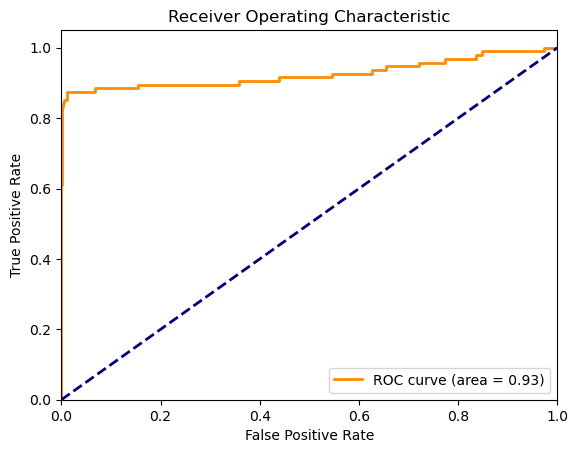

Random Forest - Classification Report:
[[566   6]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       572
           1       0.93      0.87      0.90        95

    accuracy                           0.97       667
   macro avg       0.96      0.93      0.94       667
weighted avg       0.97      0.97      0.97       667



In [56]:
RF_importances_column = [
    'Total charge',
    'Customer service calls',
    'Number vmail messages',
    'Total intl calls',
    'Total intl charge',
    'International plan',
    'Area code_415',
    'Area code_408',
    'State_TX',
    'Total night calls'
]

X_resampled_RF = X_resampled[RF_importances_column]
X_test_RF = X_test[RF_importances_column]

X_train_scaled_RF = scaler.fit_transform(X_resampled_RF)
X_test_scaled_RF = scaler.transform(X_test_RF)

best_rf_model.fit(X_train_scaled_RF, y_resampled)
y_pred = best_rf_model.predict(X_test_scaled_RF)

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, log_loss, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test_scaled_RF)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

logloss = log_loss(y_test, best_rf_model.predict_proba(X_test_scaled_RF))
print(f"Log Loss: {logloss:.4f}")

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, best_rf_model.predict_proba(X_test_scaled_RF)[:, 1])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


print("Random Forest - Classification Report:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [57]:
rf_model = best_rf_model

cv_scores = cross_val_score(
    rf_model,
    X_train_scaled_RF,
    y_resampled,
    cv=5,
    scoring='roc_auc'
)

print("Cross-Validation ROC AUC Scores:", cv_scores)
print(f"Mean CV ROC AUC: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV ROC AUC: {np.std(cv_scores):.4f}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")


Cross-Validation ROC AUC Scores: [0.97498726 0.95697536 0.96418525 0.94737022 0.99123405]
Mean CV ROC AUC: 0.9670
Standard Deviation of CV ROC AUC: 0.0151
Mean CV Accuracy: 0.9670


Accuracy: 0.9745
ROC AUC: 0.9170
Log Loss: 0.1504
Cohen's Kappa: 0.8924
Matthews Correlation Coefficient (MCC): 0.8932


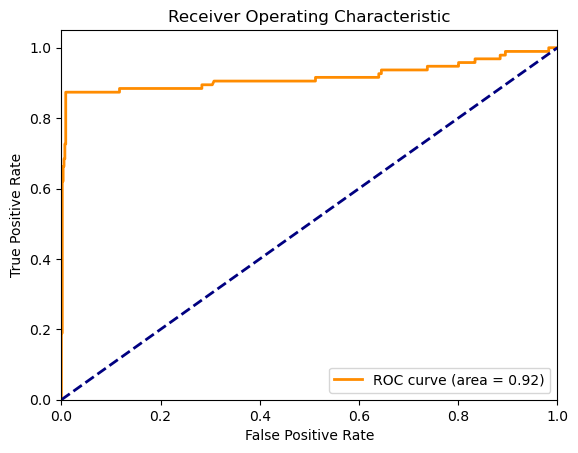

XGBoost - Classification Report:
[[567   5]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       572
           1       0.94      0.87      0.91        95

    accuracy                           0.97       667
   macro avg       0.96      0.93      0.95       667
weighted avg       0.97      0.97      0.97       667



In [58]:
XGB_importances_column =[
   'Total charge', 'Area code_415', 'Area code_408', 'Customer service calls',
    'Area code_510', 'Total intl calls', 'International plan',
    'Number vmail messages', 'State_SC', 'State_TX', 'State_MT',
    'Total intl charge', 'State_IL', 'CScalls Rate'
]

X_resampled_XGB = X_resampled[XGB_importances_column]
X_test_XGB = X_test[XGB_importances_column]

X_train_scaled_XGB = scaler.fit_transform(X_resampled_XGB)
X_test_scaled_XGB = scaler.transform(X_test_XGB)


best_xgb_model.fit(X_train_scaled_XGB, y_resampled)
y_pred = best_xgb_model.predict(X_test_scaled_XGB)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

roc_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test_scaled_XGB)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

logloss = log_loss(y_test, best_xgb_model.predict_proba(X_test_scaled_XGB))
print(f"Log Loss: {logloss:.4f}")

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, best_xgb_model.predict_proba(X_test_scaled_XGB)[:, 1])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("XGBoost - Classification Report:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [59]:
rf_model = best_xgb_model

cv_scores1 = cross_val_score(
    best_xgb_model,
    X_train_scaled_XGB,
    y_resampled,
    cv=5,
    scoring='roc_auc'
)

print("Cross-Validation ROC AUC Scores:", cv_scores1)
print(f"Mean CV ROC AUC: {np.mean(cv_scores1):.4f}")
print(f"Standard Deviation of CV ROC AUC: {np.std(cv_scores1):.4f}")
print(f"Mean CV Accuracy: {np.mean(cv_scores1):.4f}")


Cross-Validation ROC AUC Scores: [0.96185217 0.95748513 0.97749571 0.97939832 0.98562317]
Mean CV ROC AUC: 0.9724
Standard Deviation of CV ROC AUC: 0.0108
Mean CV Accuracy: 0.9724


In [60]:
import time

start_time = time.time()
best_rf_model.fit(X_train_scaled_RF, y_resampled)
rf_training_time = time.time() - start_time
print(f"Random Forest Training Time: {rf_training_time:.4f} seconds")

# Measure prediction time for Random Forest
start_time = time.time()
y_pred_rf = best_rf_model.predict(X_test_scaled_RF)
rf_prediction_time = time.time() - start_time
print(f"Random Forest Prediction Time: {rf_prediction_time:.4f} seconds")


Random Forest Training Time: 1.6918 seconds
Random Forest Prediction Time: 0.0330 seconds


In [61]:
# Measure training time for XGBoost
start_time = time.time()
best_xgb_model.fit(X_train_scaled_XGB, y_resampled)
xgb_training_time = time.time() - start_time
print(f"XGBoost Training Time: {xgb_training_time:.4f} seconds")

# Measure prediction time for XGBoost
start_time = time.time()
y_pred_xgb = best_xgb_model.predict(X_test_scaled_XGB)
xgb_prediction_time = time.time() - start_time
print(f"XGBoost Prediction Time: {xgb_prediction_time:.4f} seconds")


XGBoost Training Time: 0.1130 seconds
XGBoost Prediction Time: 0.0020 seconds


import pickle

with open('XGBoost.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)
print("XGBoost model saved as 'XGBoost.pkl'.")

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
print("Scaler saved as 'scaler.pkl'.")

with open('encoder_state.pkl', 'wb') as file:
    pickle.dump(encoder_state, file)
print("State encoder saved as 'encoder_state.pkl'.")

with open('encoder_area.pkl', 'wb') as file:
    pickle.dump(encoder_area, file)
print("Area code encoder saved as 'encoder_area.pkl'.")

In [126]:
encoded_states_df_X.columns

Index(['State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
       'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI',
       'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
       'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
       'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE',
       'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
       'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD',
       'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA',
       'State_WI', 'State_WV', 'State_WY'],
      dtype='object')

C:\Users\Mega Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mega Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mega Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Mega Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

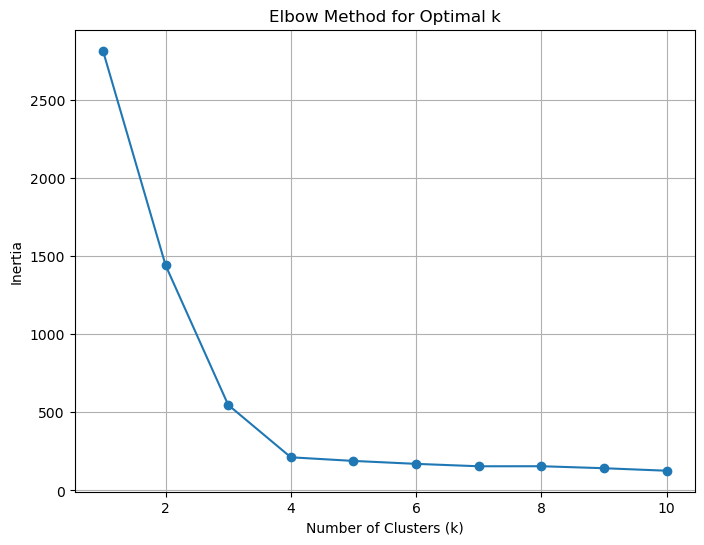

C:\Users\Mega Pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


IndexError: boolean index did not match indexed array along dimension 0; dimension is 300 but corresponding boolean dimension is 667

<Figure size 800x600 with 0 Axes>

In [129]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Step 2: Elbow Method to Determine Optimal Number of Clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 3: Apply K-Means Clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_test_scaled_XGB)

# Step 4: Get cluster assignments and centroids
labels = kmeans.labels_  # Cluster labels for each point
centroids = kmeans.cluster_centers_  # Coordinates of cluster centroids

